# Notebook to play around with the data relevant to us in NuScenes

In [1]:
import dataset
import random

In [2]:
d = dataset.NuScenesDataset("../data/sets/nuscenes")

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.637 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [22]:
random_sample = d.nusc.sample[random.randint(0,len(d.nusc.sample))]

In [23]:
# Whats in the sample?
d.nusc.list_sample(random_sample['token'])

Sample: 3e7ed5cf0b4541e4a0e1b109dfea89cf

sample_data_token: dee3269271294a879373e26a5f3b1d8b, mod: radar, channel: RADAR_FRONT
sample_data_token: ea97de10769946b590cbef8d08083793, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: ee012a693fa74433a31e9b6ffd2cc230, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: a548ad6bdc884dc39beaa45e5121772d, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 0edfdb6a6f024cd9879c2684060a8f30, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 49ba1c7ea209428aa648affaa00e3347, mod: lidar, channel: LIDAR_TOP
sample_data_token: b076d37011b64c70bd5a42d369c8f74a, mod: camera, channel: CAM_FRONT
sample_data_token: a508e376306a42dbbcd6792f97af77a5, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: cc3b339a65bc493f9eb84b54b3a21a4c, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 2f420ed2ffa44c94b695b62572fb98c5, mod: camera, channel: CAM_BACK
sample_data_token: 27be4838857044ca81141fd97156c056, mod: camera, channel:

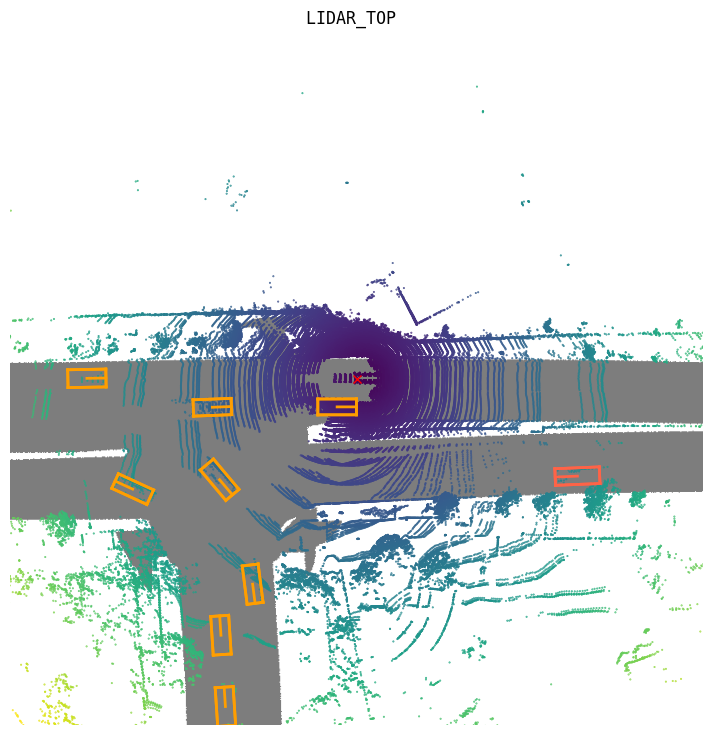

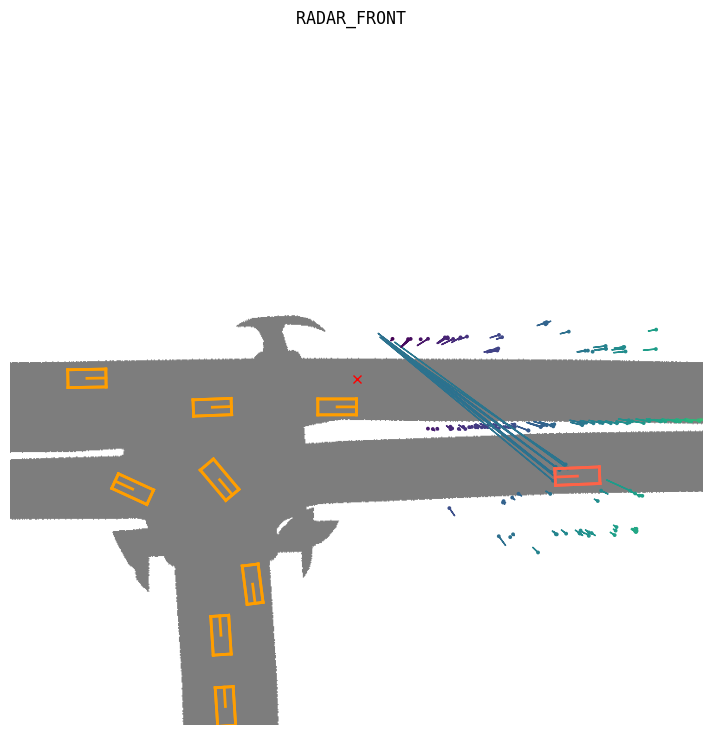

In [24]:
d.nusc.render_sample_data(random_sample['data']['LIDAR_TOP'], nsweeps=5, underlay_map=True)
d.nusc.render_sample_data(random_sample['data']['RADAR_FRONT'], nsweeps=5, underlay_map=True)

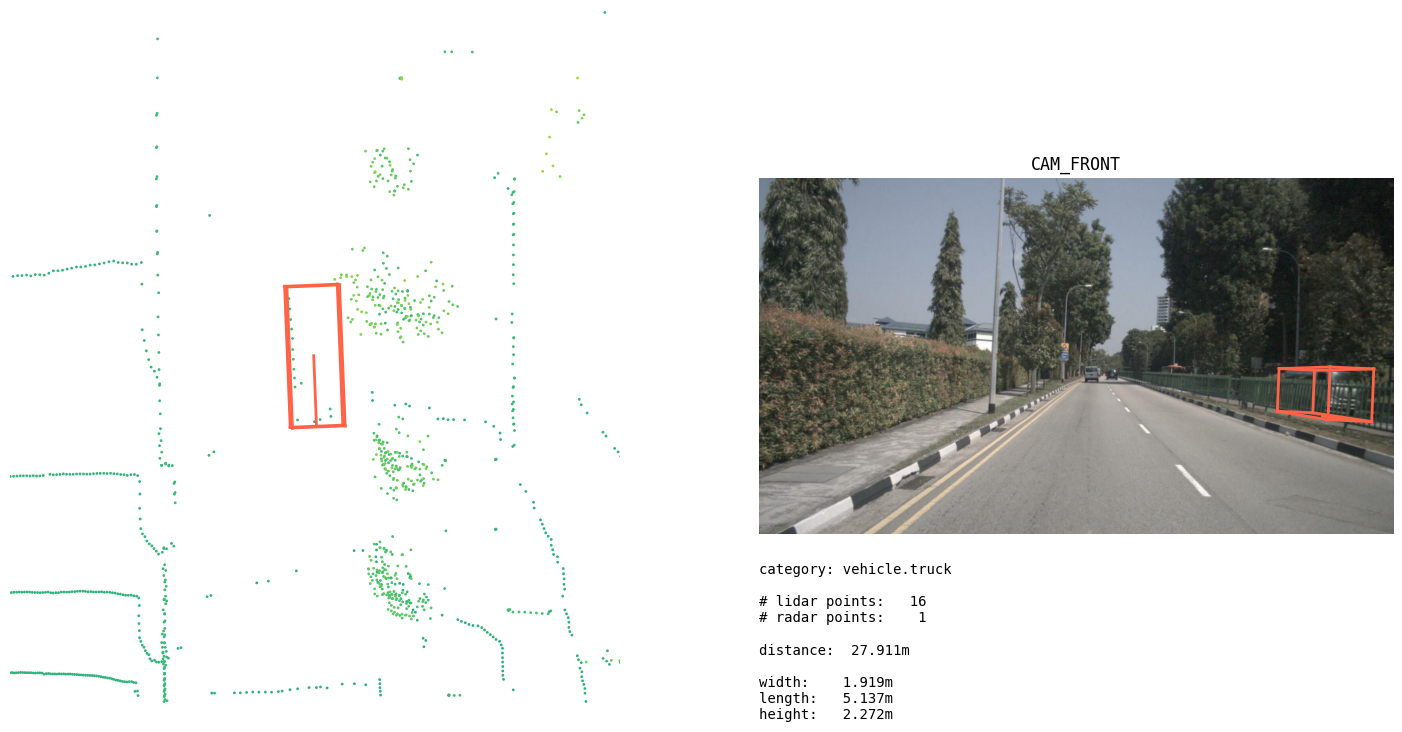

In [25]:
# give more info about one "thing" in the sample
d.nusc.render_annotation(random_sample['anns'][random.randint(0,len(random_sample['anns']))],extra_info=True)

[{'token': 'c5224b9b454b4ded9b5d2d2634bbda8a', 'log_token': '8ff48ad1df8e4966a2151730c92b7f3c', 'nbr_samples': 40, 'first_sample_token': 'c1676a2feac74eee8aa38ca3901787d6', 'last_sample_token': '63c24b51feb94f14bec29022dae4975d', 'name': 'scene-0796', 'description': 'Scooter, peds on sidewalk, bus, cars, truck, fake construction worker, bicycle, cross intersection, car overtaking us'}]
{'token': '8ff48ad1df8e4966a2151730c92b7f3c', 'logfile': 'n015-2018-10-02-10-50-40+0800', 'vehicle': 'n015', 'date_captured': '2018-10-02', 'location': 'singapore-queenstown', 'map_token': '93406b464a165eaba6d9de76ca09f5da'}
Adding ego poses to map...


100%|██████████| 1/1 [00:00<00:00, 153.31it/s]

Creating plot...


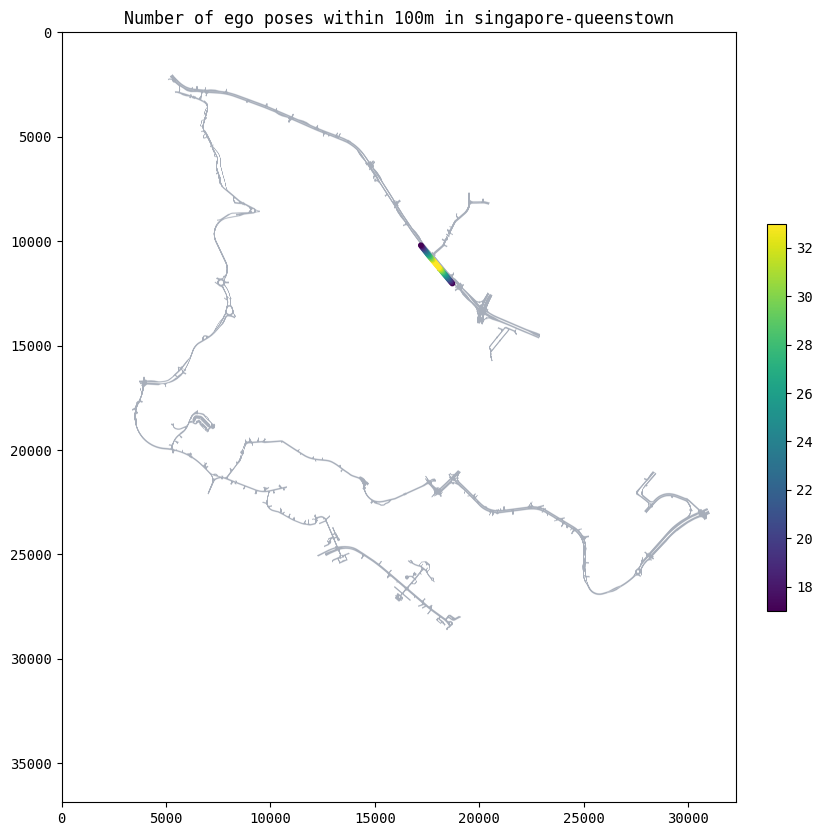

In [28]:
# Render scene on map (takes a bit of time)
scene_token = random_sample["scene_token"]
scene = [e for e in d.nusc.scene if e['token'] == scene_token]
assert(len(scene)==1)
#information about the scene, prob should be a helper function somewhere, if not should make one?
print(scene)
scene = scene[0]
log = [e for e in d.nusc.log if e['token'] == scene["log_token"]]
assert(len(log)==1)
log = log[0]
print(log)
d.nusc.render_egoposes_on_map(log_location=log["location"],scene_tokens=[scene["token"]])